Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import seaborn as sns
from pathlib import Path

Reading the Dataset

In [14]:
file_path = "/content/bankmarketing.xlsx"
bank= pd.read_excel(file_path)
print(bank)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

Removing unwanted columns from the dataset

In [15]:
bank.drop(columns=['day','month','duration','campaign','pdays','previous'],inplace=True)
bank

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,unknown,no


In [16]:
bank.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact poutcome    y  
0        unknown  unknown   no  
1        unknown  unknown   no  
2        unknown  unknown   no  
3        unknown  unknown   no  
4        unknown  unknown   no  
...          ...      ...  ...  
45206   cellular  unknown  yes  
45207   cellular  unknown  yes  
45208   cellular  success  yes  
45209  telephone  unknown   no  
45210   cellular    other   no  

[45211 rows x 11 columns]>

In [17]:
bank.describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


In [18]:
bank.nunique().sort_values(ascending=True)

default         2
housing         2
loan            2
y               2
marital         3
contact         3
education       4
poutcome        4
job            12
age            77
balance      7168
dtype: int64

In [19]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
poutcome     0
y            0
dtype: int64

In [20]:
plt.rcParams['axes.facecolor'] = 'lavenderblush'

In [21]:
plt.figure(figsize = (10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='loan', ylabel='count'>

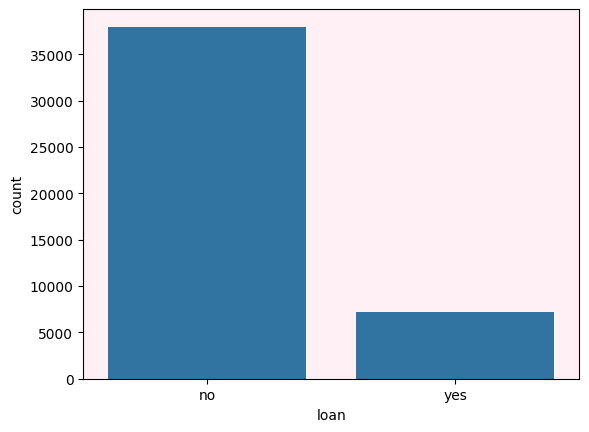

In [22]:
sns.countplot(x="loan",data= bank)

Defining LabelEncoder

In [30]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

Training the dataset

In [31]:
def labelencoderconvert(a):
    le.fit(bank[a].values)
    bank[a]=le.transform(bank[a].values)

labelencoderconvert('job')
labelencoderconvert('marital')
labelencoderconvert('education')
labelencoderconvert('default')
labelencoderconvert('housing')
labelencoderconvert('loan')
labelencoderconvert('contact')
labelencoderconvert('poutcome')
labelencoderconvert('y')
bank

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
0,58,4,1,2,0,2143,1,0,2,3,0
1,44,9,2,1,0,29,1,0,2,3,0
2,33,2,1,1,0,2,1,1,2,3,0
3,47,1,1,3,0,1506,1,0,2,3,0
4,33,11,2,3,0,1,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,3,1
45207,71,5,0,0,0,1729,0,0,0,3,1
45208,72,5,1,1,0,5715,0,0,0,2,1
45209,57,1,1,1,0,668,0,0,1,3,0


Building a Decision Tree Classifier

In [33]:
X=bank.drop(columns=['y'])
Y=bank['y']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
y_prede=dtc.predict(x_test)
accuracy = accuracy_score(y_test,y_prede)
print("The accuracy of our model is", accuracy)

The accuracy of our model is 0.8184901209082867


Visualising our Decision Tree Classifier

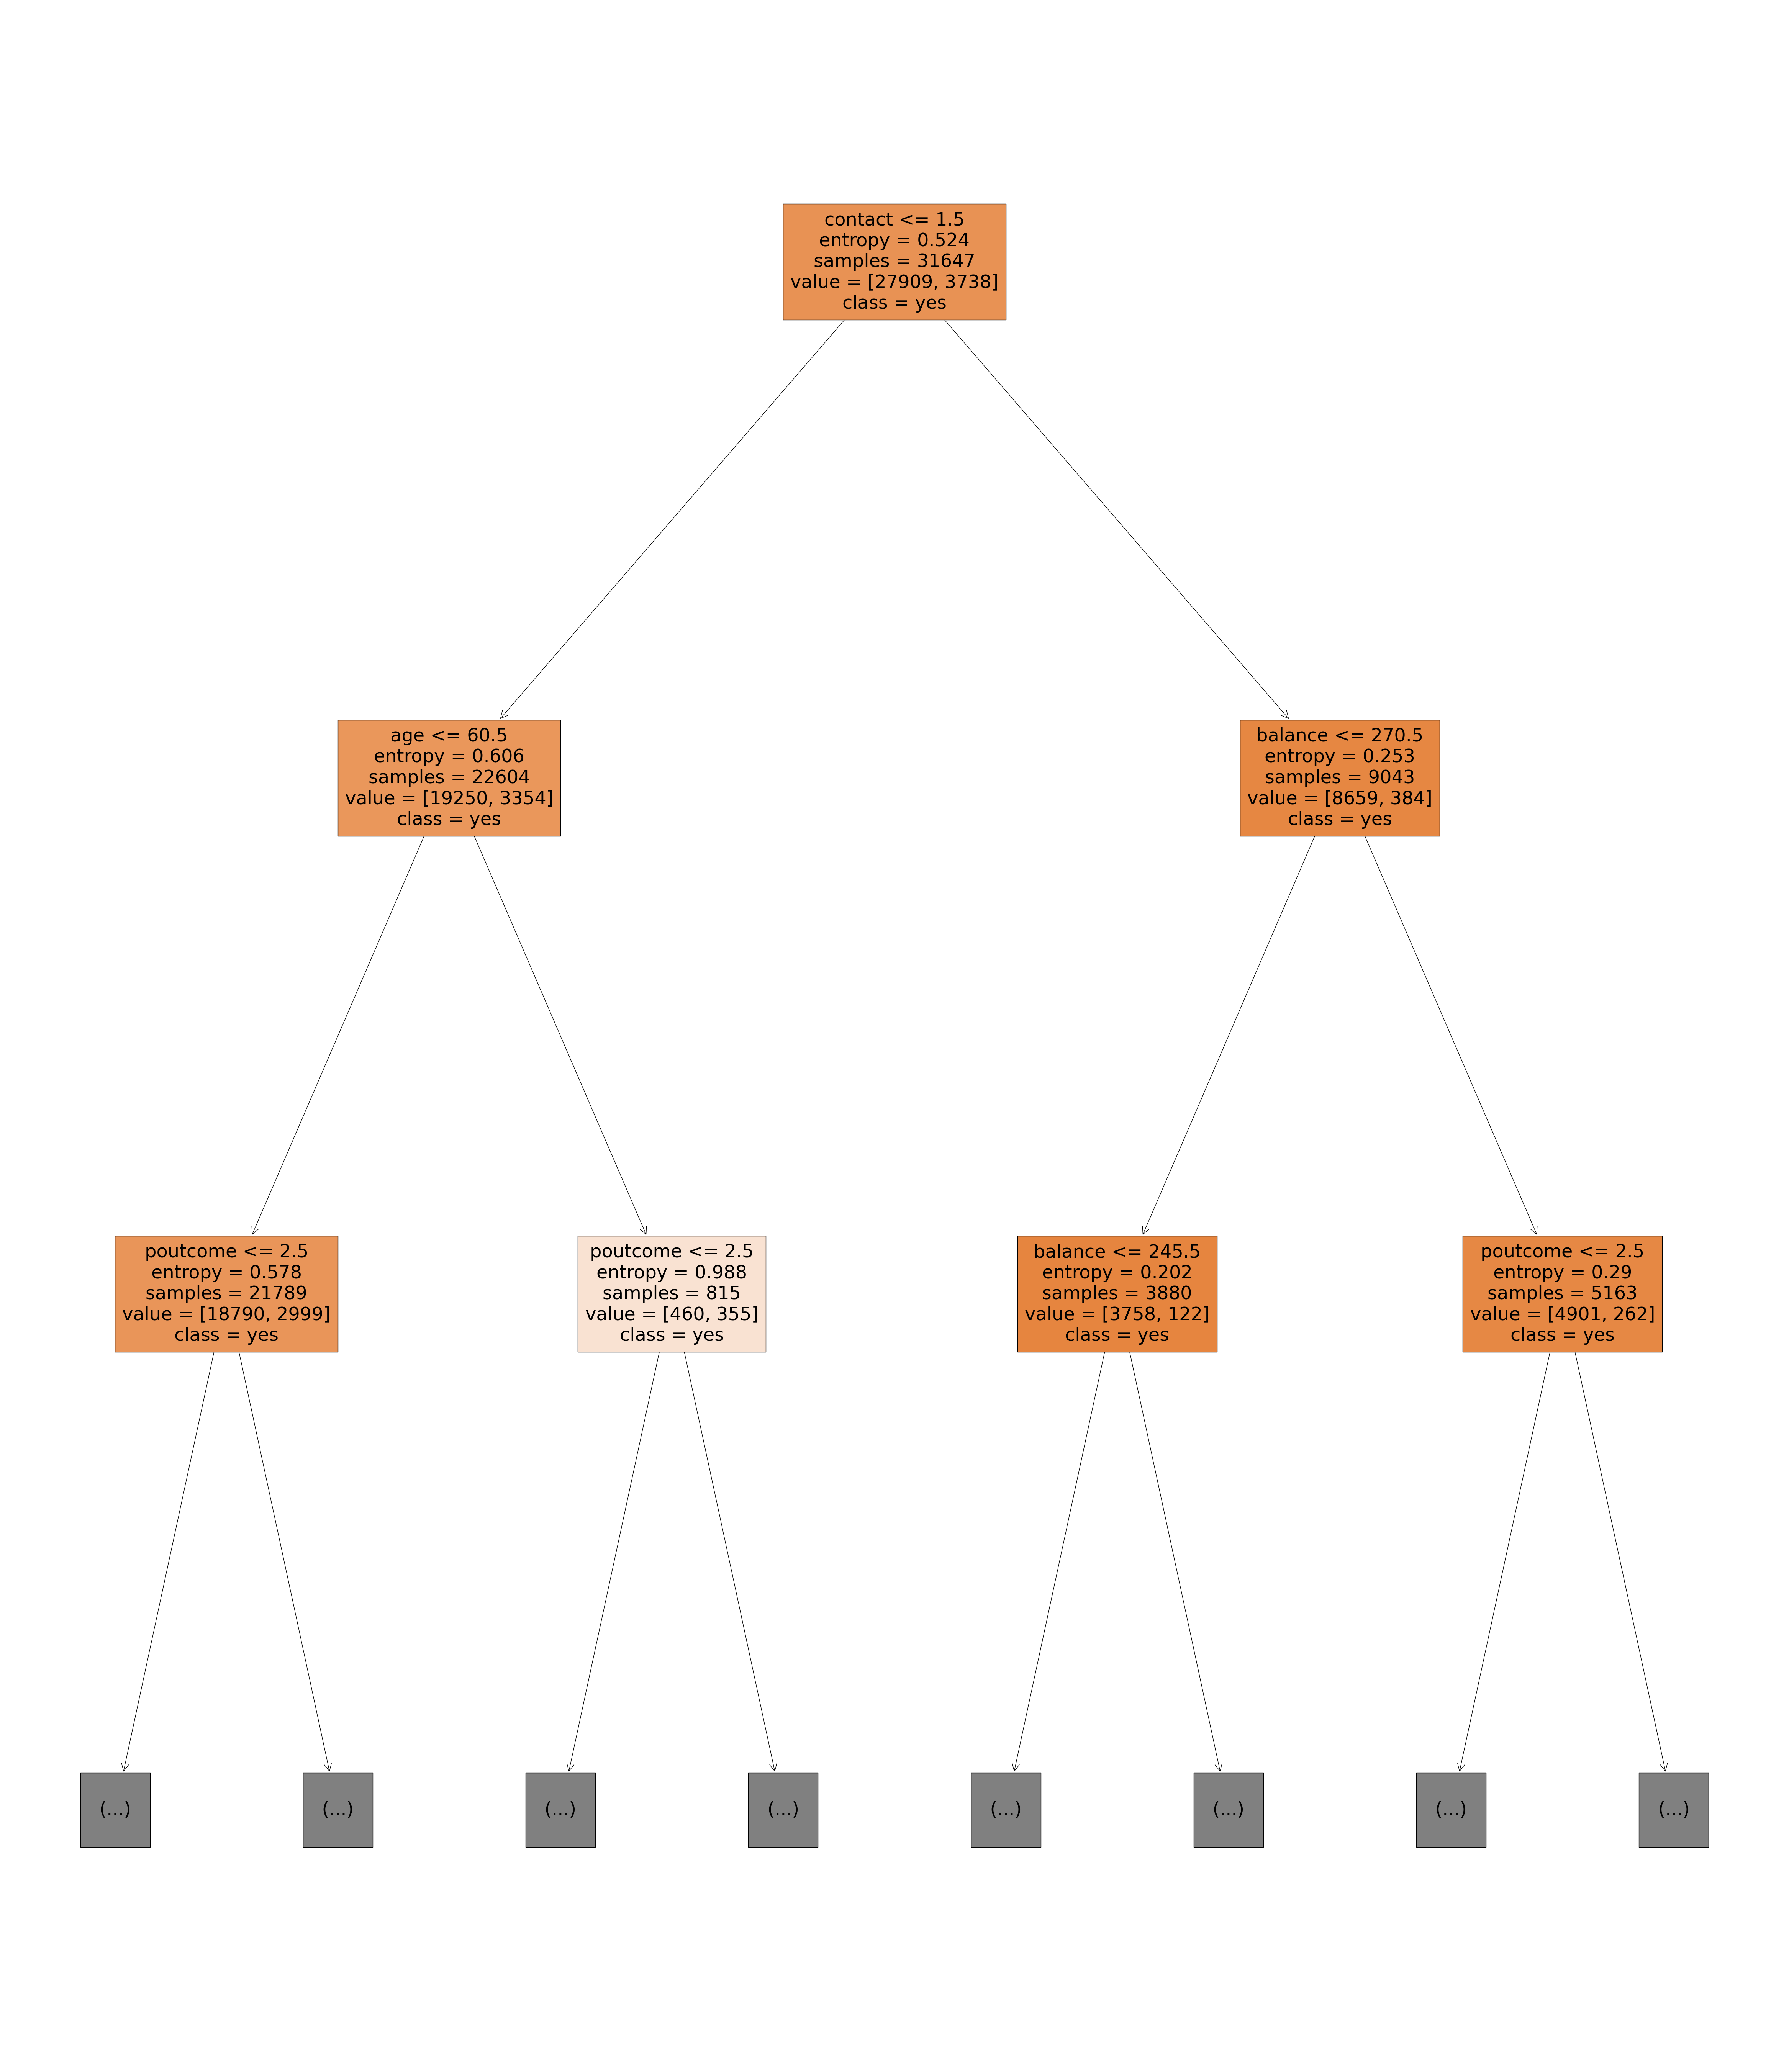

In [34]:
plt.figure(figsize=(60,70))
_=plot_tree(dtc,max_depth=2,feature_names=X.columns,class_names=['yes','no'],filled=True)

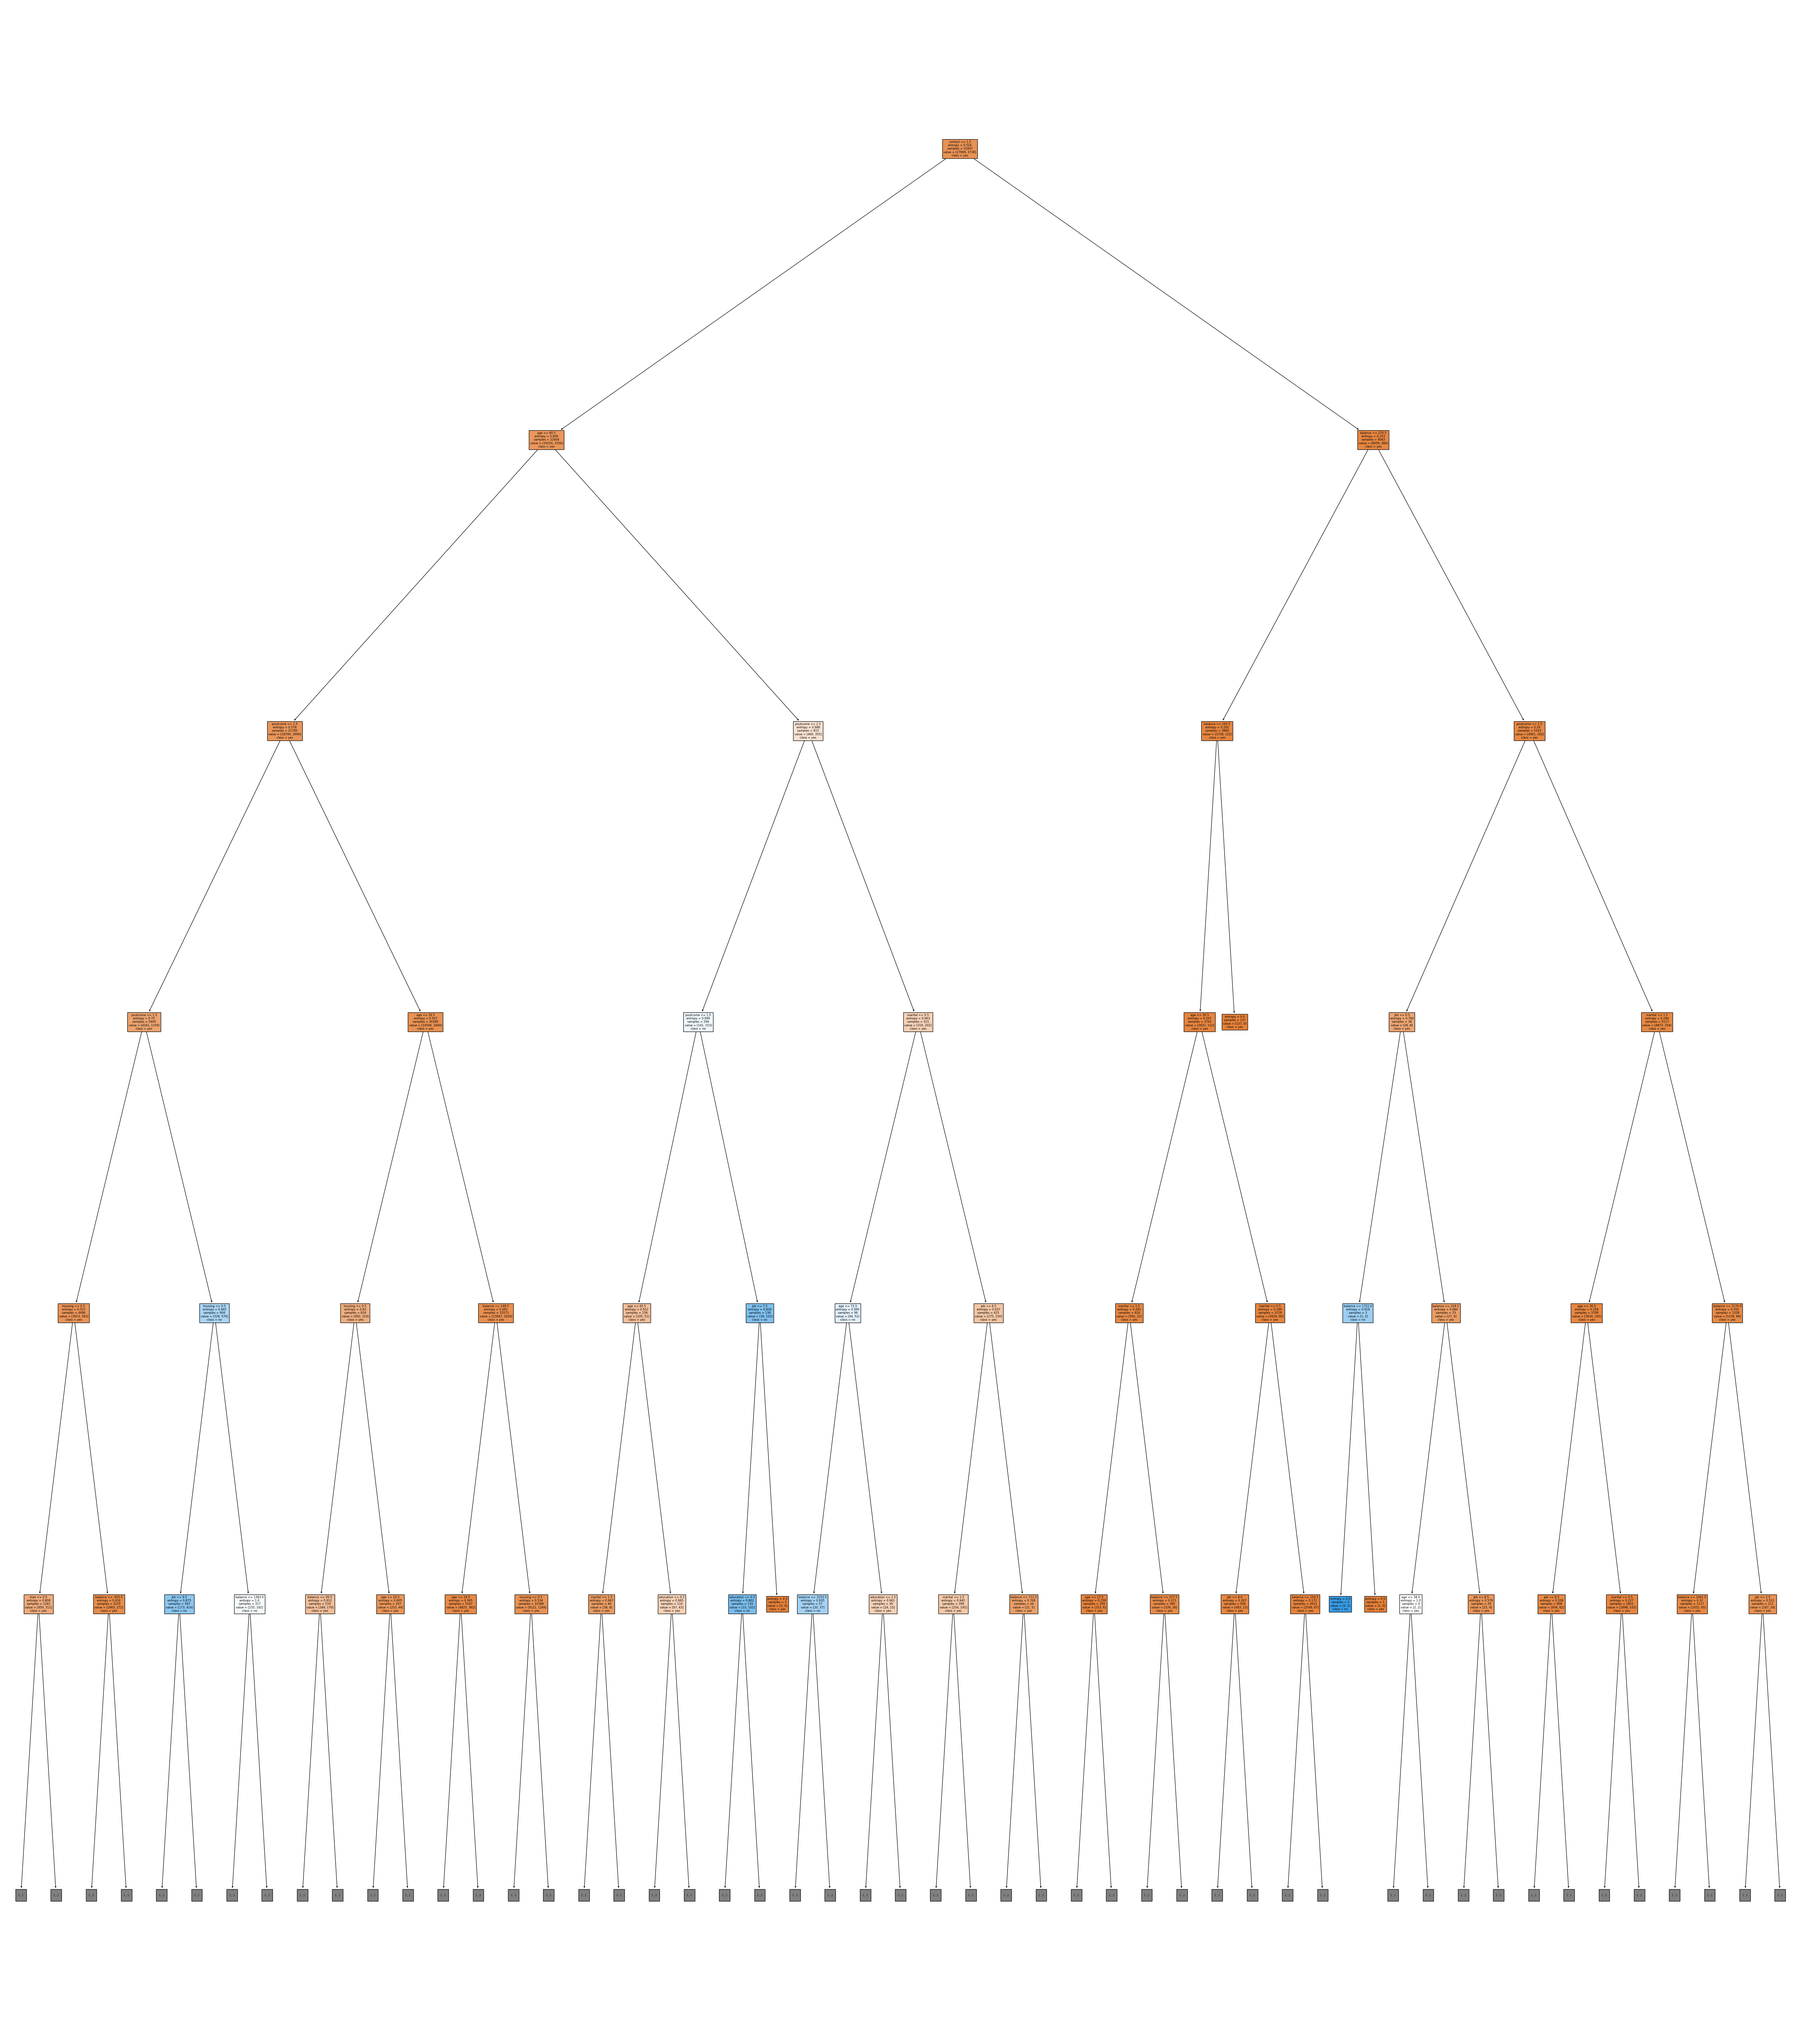

In [35]:
plt.figure(figsize=(70,80))
_=plot_tree(dtc,max_depth=5,feature_names=X.columns,class_names=['yes','no'],filled=True)